<a href="https://colab.research.google.com/github/SupunTd/Arduino-Car-Coding/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')


In [13]:
from google.colab import drive
data = pd.read_csv('/content/car_price_prediction.csv')

Data Collection and Processing

In [14]:
# inspecting the first 5 rows of the dataframe
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [15]:
# checking the number of rows and columns
data.shape

(19237, 18)

In [16]:
# getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [17]:
# checking the number of missing values
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [18]:
# Check the number of unique values of each column
data.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

Encoding the Categorical Data

In [19]:
# encoding "Fuel_Type" Column
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [20]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


**checking the unique values for each column**

In [21]:
for col in data.columns:
    print(f'Category in {col} is :\n {data[col].unique()}\n')
    print('\\'*50)

Category in ID is :
 [45654403 44731507 45774419 ... 45804997 45793526 45813273]

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Category in Price is :
 [13328 16621  8467 ... 56814 63886 22075]

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Category in Levy is :
 ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'


In [22]:
# Check statistic of dataset
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


Dropping the ID and Doors columns which will not provide

In [23]:
data=data.drop(['ID','Doors'],axis=1)

In [24]:
# Replacing '-' with 0
data['Levy']=data['Levy'].replace('-','0')

# Converting Levy type to float
data['Levy'] = data['Levy'].astype('float64')

In [25]:
dtime = dt.datetime.now()
data['Age']=dtime.year - data['Prod. year']

In [ ]:
data = data.drop('Prod. year',axis=1)

In [26]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,10


In [27]:
# Replacing 'Km' with ''
data['Mileage'] =data['Mileage'].str.replace('km',"")

# Converting Mileage type to int64
data.Mileage = data.Mileage.astype('Int64')

In [28]:
# Replacing 'Turbo' with ''
data['Engine volume'] = data['Engine volume'].str.replace('Turbo','')

# Converting Levy type to float
data['Engine volume'] = data['Engine volume'].astype('float64')

In [29]:
data['Engine volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

**Final Data Set**

In [30]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,10


# Analysis & Visualiation

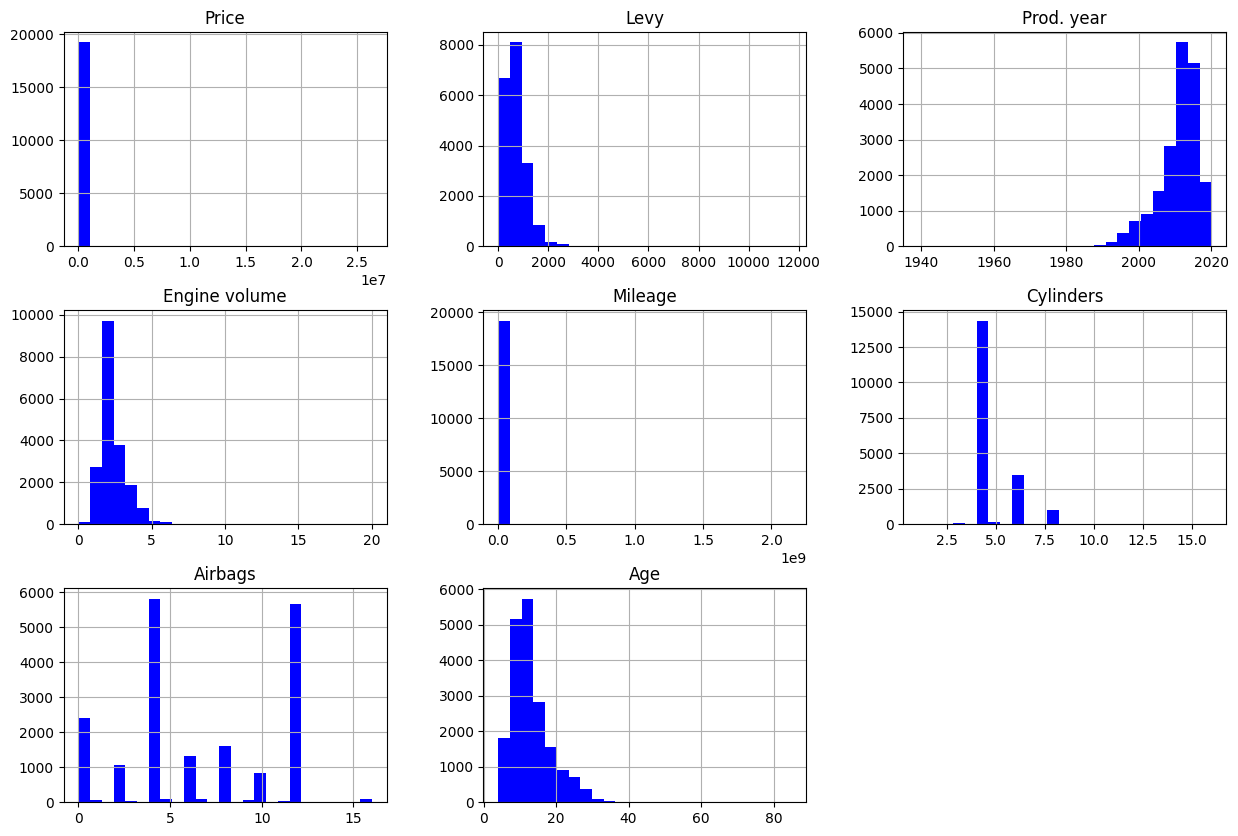

In [31]:
data.hist(bins=25,figsize=(15,10),color='blue')
plt.show()

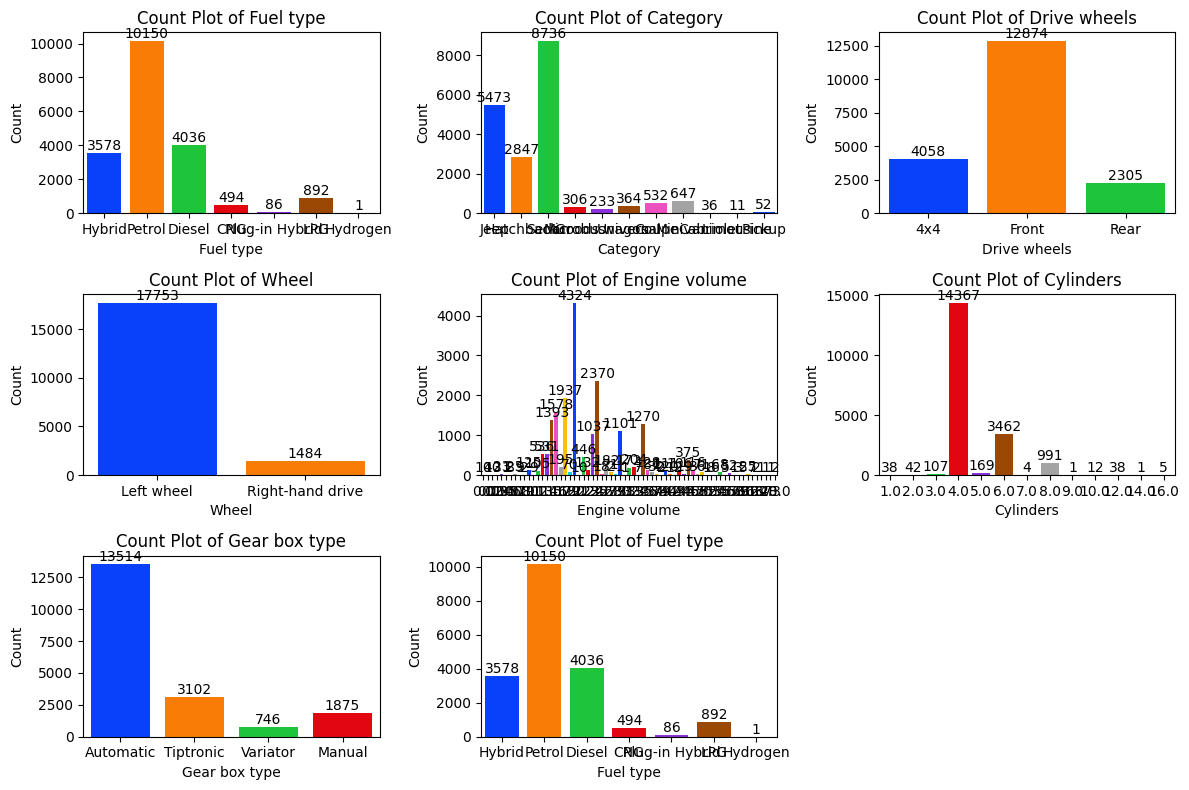

In [39]:
# Define the list of categorical columns to analyze
categorical_columns = ['Fuel type', 'Category', 'Drive wheels', 'Wheel',
                       'Engine volume', 'Cylinders', 'Gear box type', 'Fuel type']
num_plots = min(len(categorical_columns), len(axes))
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.ravel()

for i, column in enumerate(categorical_columns[:num_plots]):
    sns.countplot(x=data[column], data=data, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')
for j in range(num_plots, len(axes)):
    axes[j].axis('off')

# Show plots
plt.tight_layout()
plt.show()


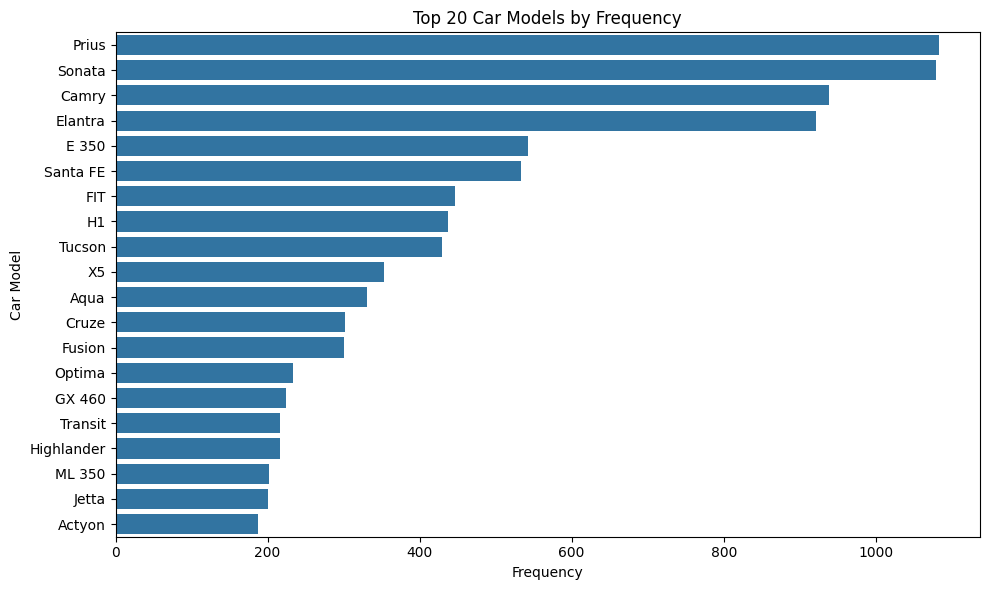

In [40]:
n = 20  # Number of top car models to plot
top_car_models = car_dataset['Model'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

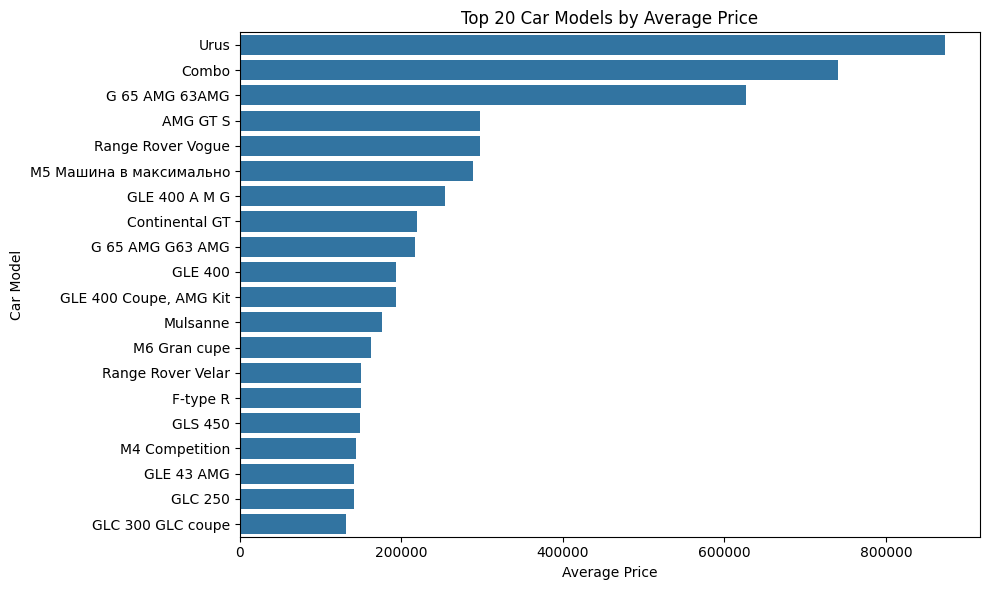

In [41]:
# Calculate average price for each car model
avg_prices_by_car = car_dataset.groupby('Model')['Price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()


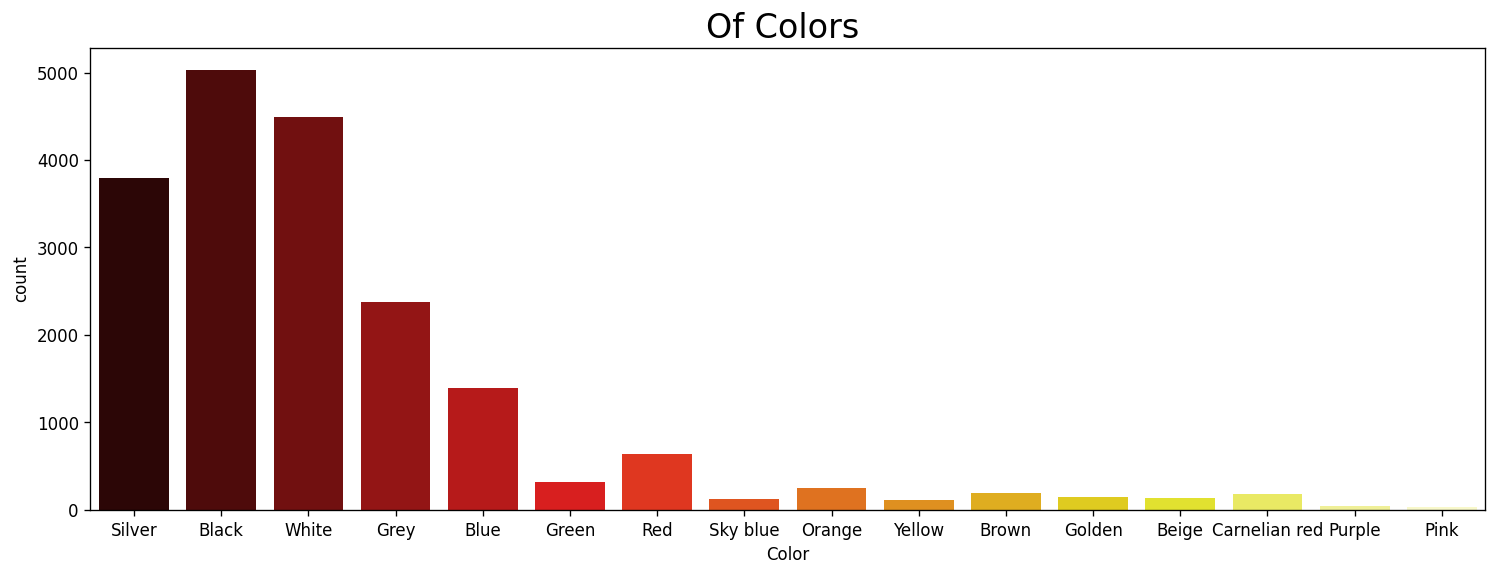

In [42]:
plt.subplots(figsize=(15,5), dpi=120)
sns.countplot(data= data, x='Color',palette='hot')
plt.title("Of Colors ",fontsize=20)
plt.show()

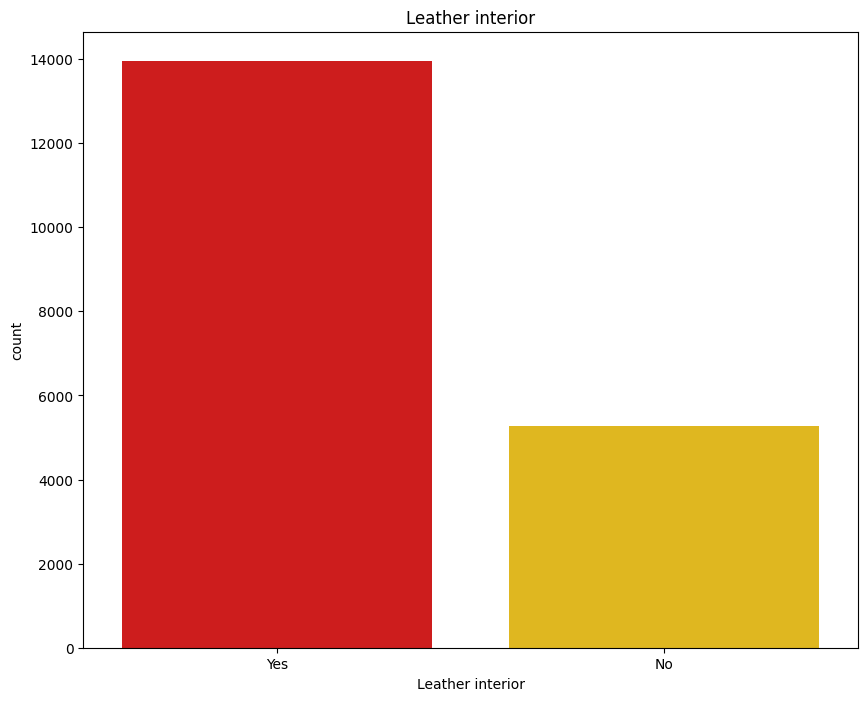

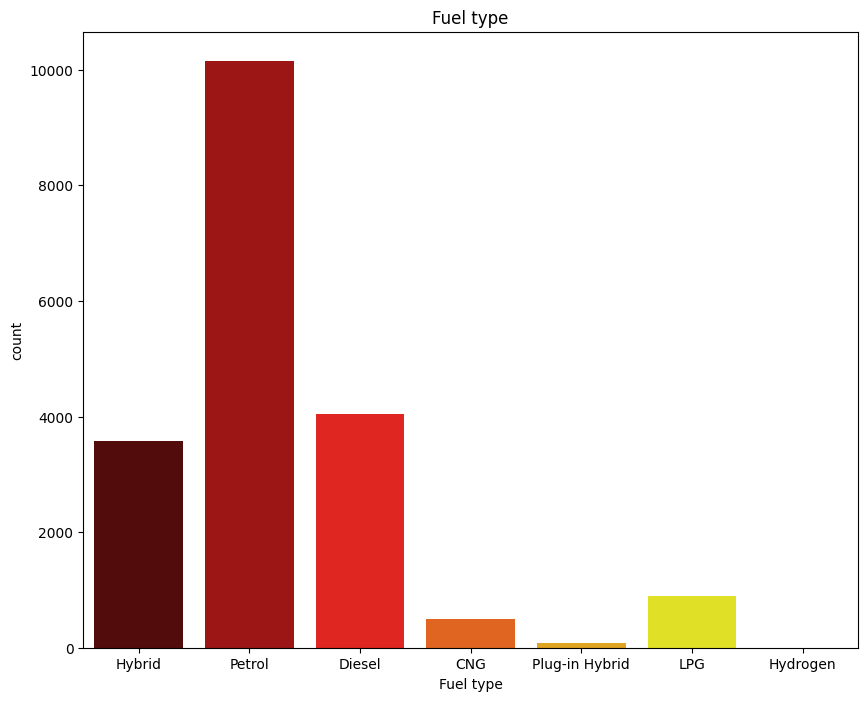

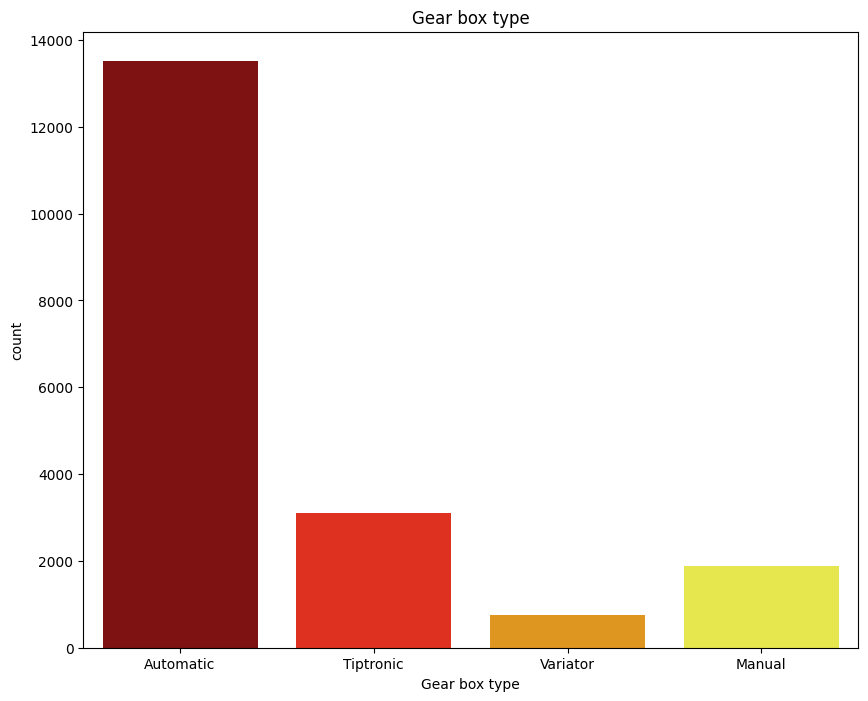

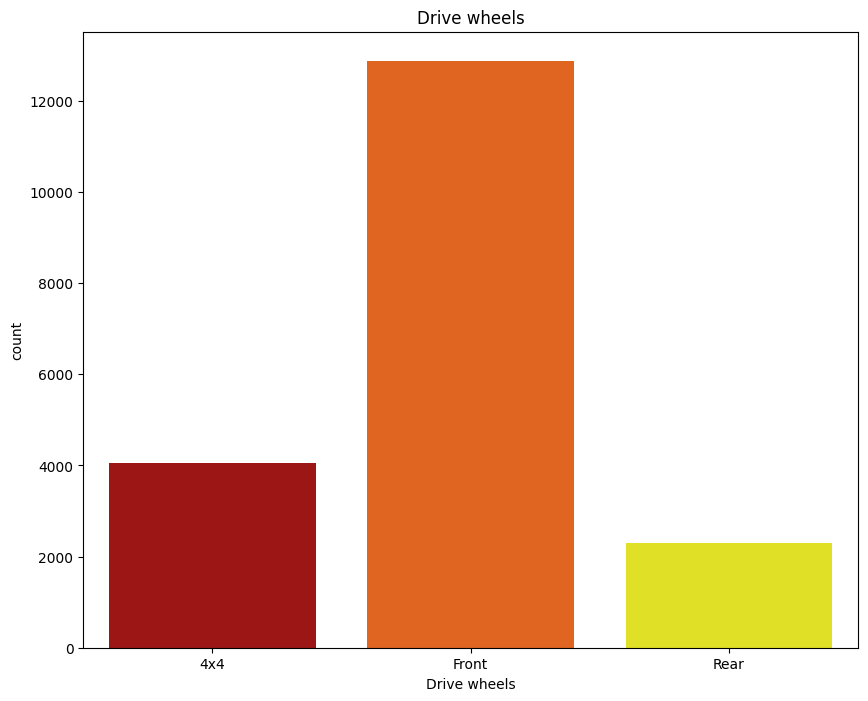

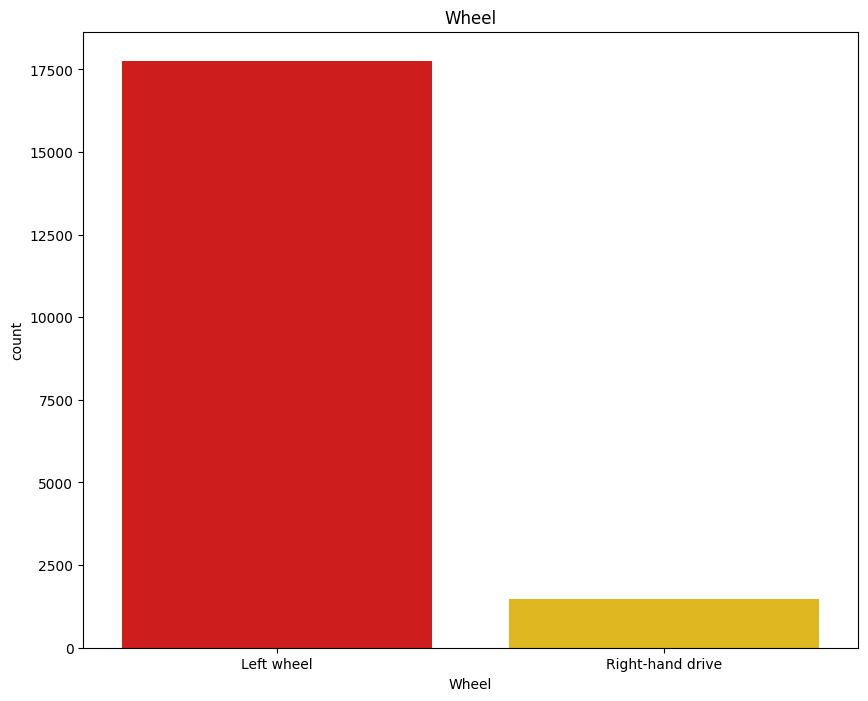

In [43]:
columns =['Leather interior','Fuel type','Gear box type','Drive wheels','Wheel']
for col in columns:
    plt.figure(figsize=(10,8))
    #top10 = data[col].value_counts()[:10]
    sns.countplot(data=data,x=col,palette='hot')
    plt.title(col)
    plt.show()

In [44]:
top_10_cars = data.Manufacturer.value_counts().sort_values(ascending=False)[:10]
top_10_cars

Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
BMW              1049
LEXUS             982
HONDA             977
NISSAN            660
VOLKSWAGEN        579
Name: count, dtype: int64

**Top 10 cars average price**

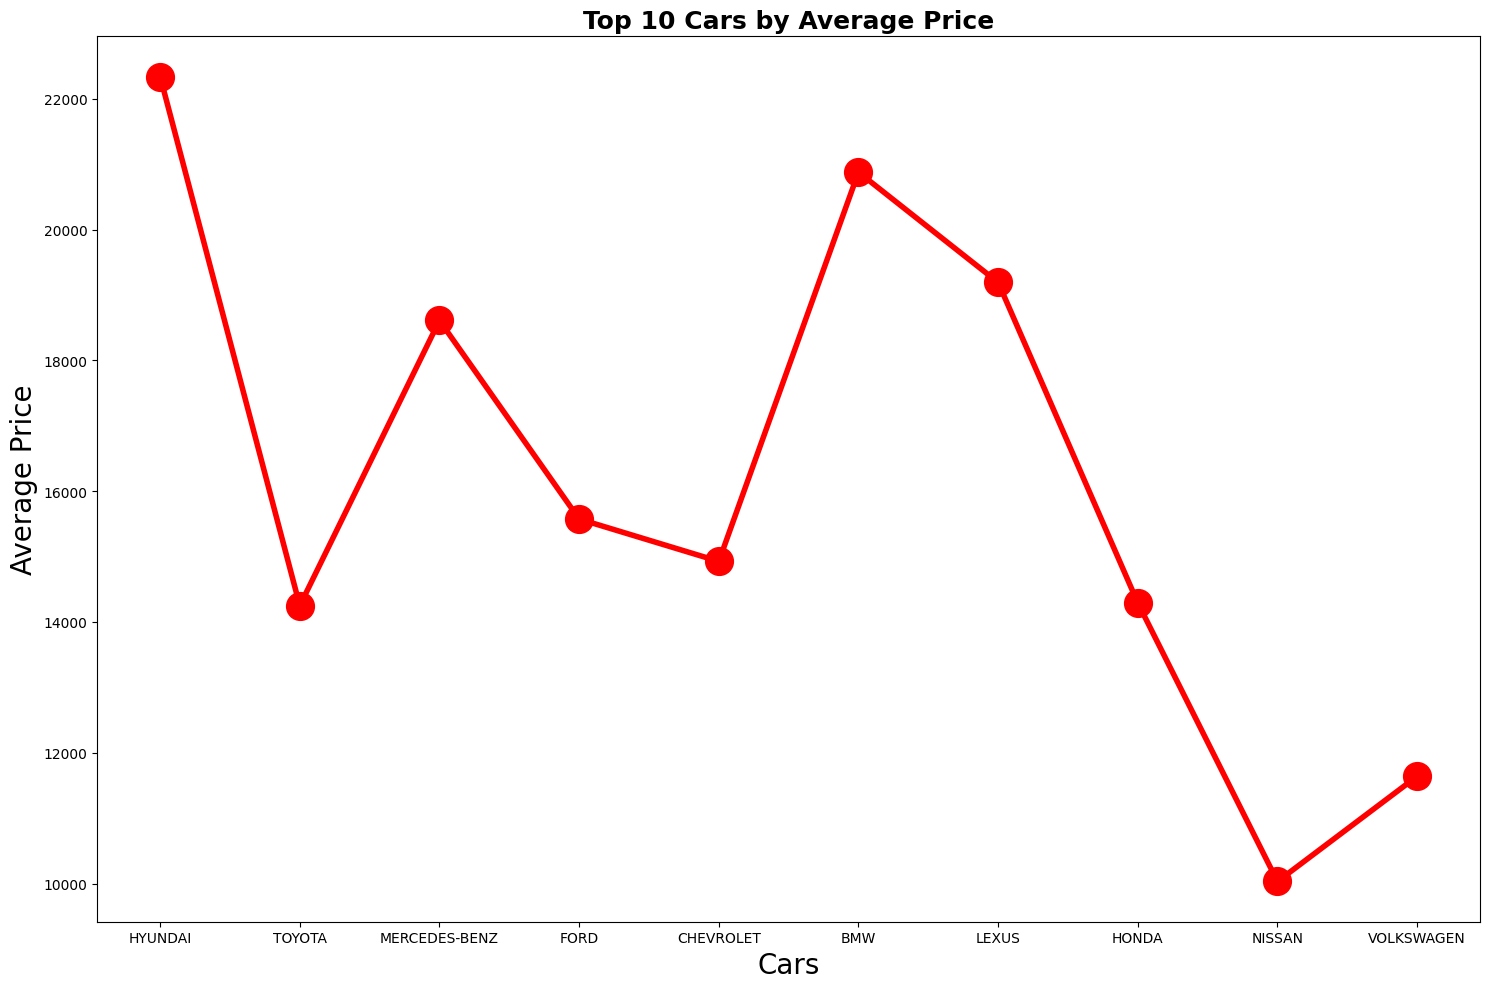

In [46]:
top_10_cars_means_prices = [data[data['Manufacturer']==i]['Price'].mean() for i in list(top_10_cars.index)]
plt.figure(figsize=(15,10))
plt.plot(top_10_cars.index,top_10_cars_means_prices,color='r',
         linewidth = 4,marker='o',markersize = 20)
plt.title('Top 10 Cars by Average Price',loc='center',fontweight='bold',fontsize=18)
plt.ylabel('Average Price',fontsize=20)
plt.xlabel('Cars',fontsize=20)
plt.tight_layout()
plt.show()

<Axes: xlabel='Price', ylabel='Levy'>

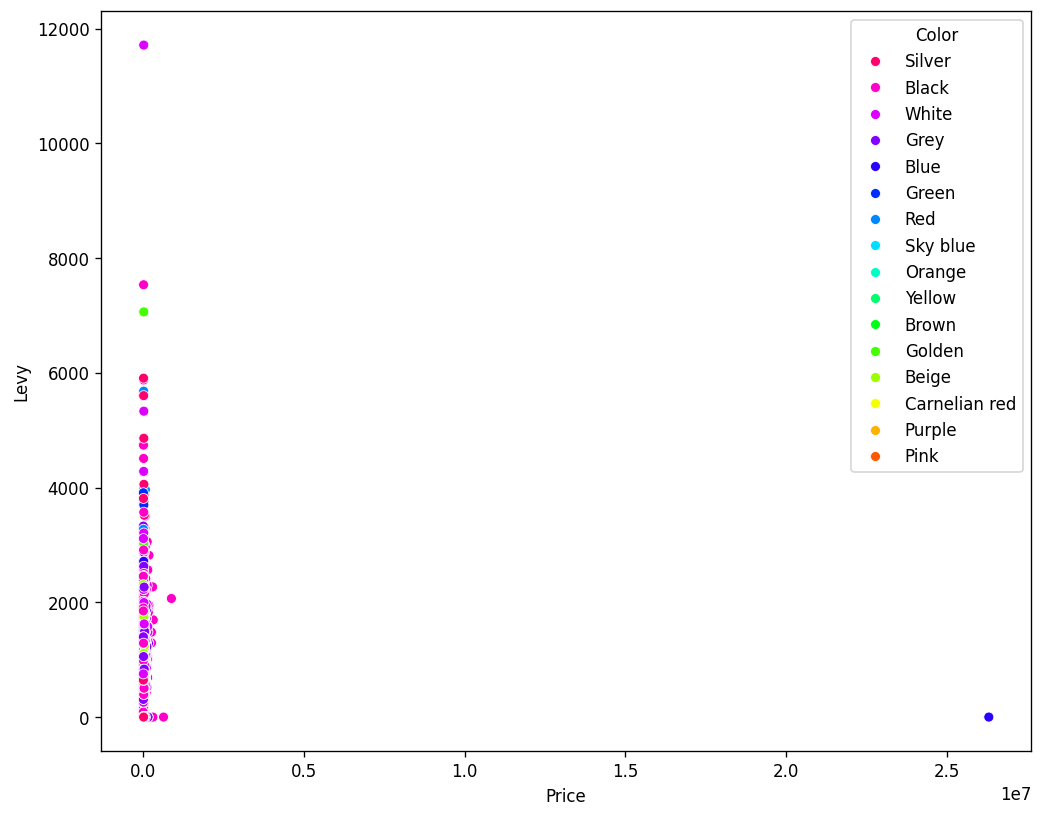

In [47]:
plt.figure(figsize=(10, 8), dpi=120)
sns.scatterplot(data=data, x='Price', y='Levy', hue="Color", palette="hsv_r")

**Correlation Matrix Correlation Matrix Generation**

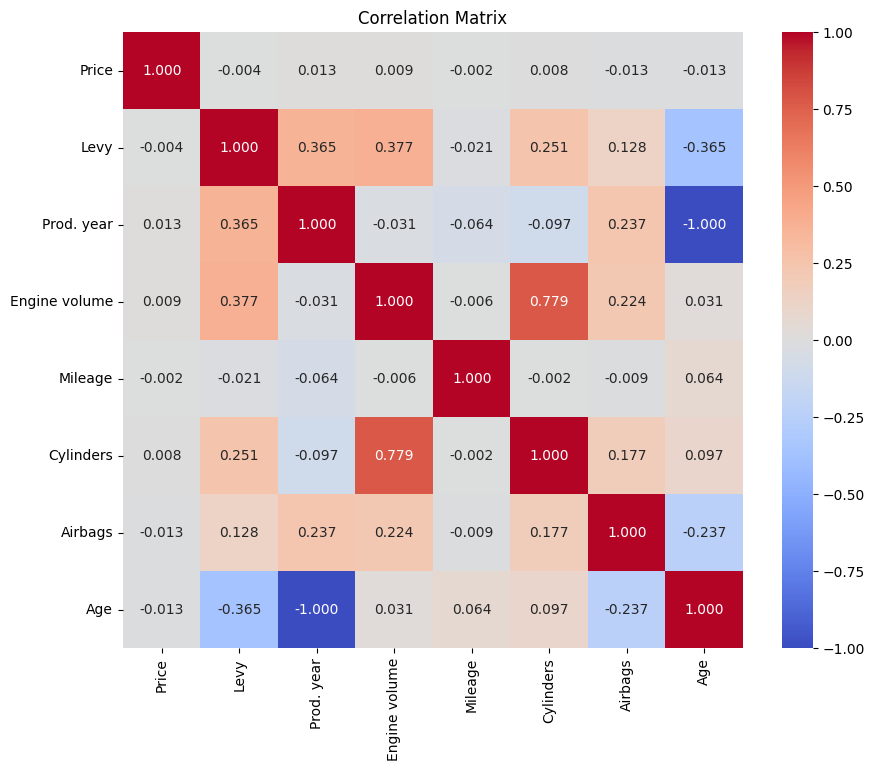

In [50]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

# Remove non-numeric columns
numeric_dataset = data.drop(columns=non_numeric_columns)

# Generate correlation matrix
correlation_matrix = numeric_dataset.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix')
plt.show()


<Axes: >

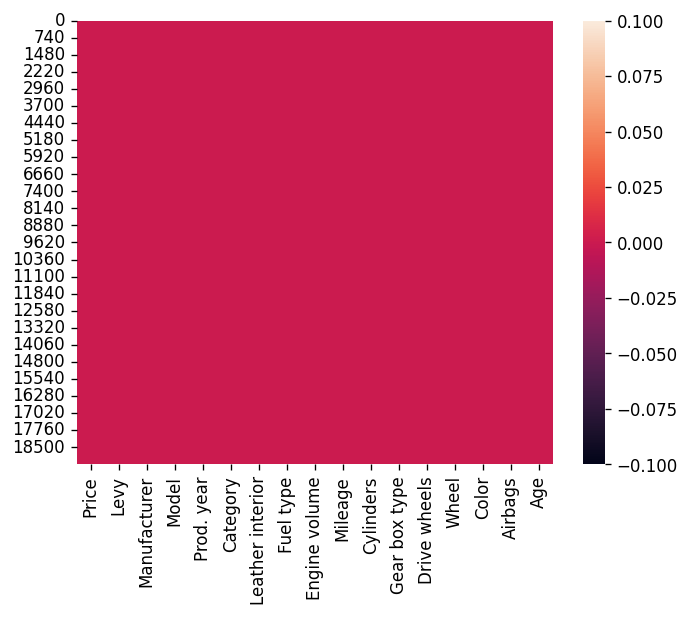

In [51]:
plt.figure(dpi=120)
sns.heatmap(data.isna())

**Detect Outliner**

In [52]:
# Define the numeric columns
numeric_data = data.select_dtypes(exclude=object)

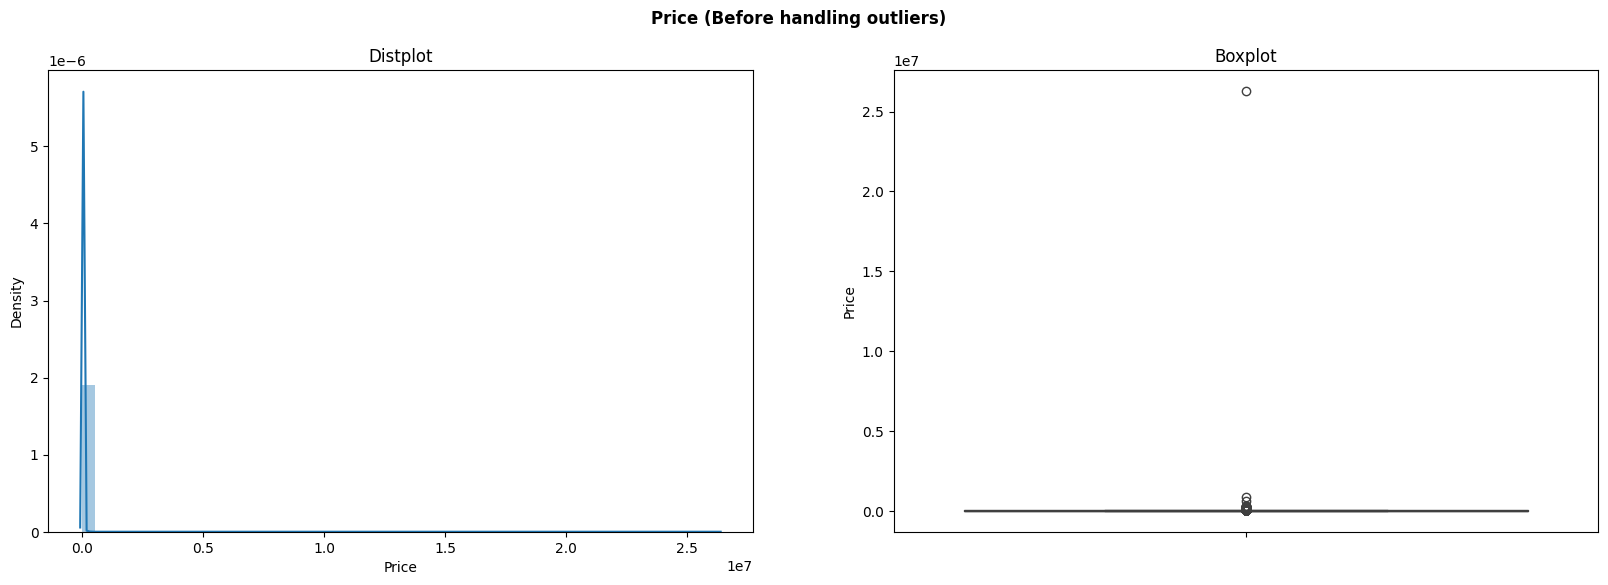

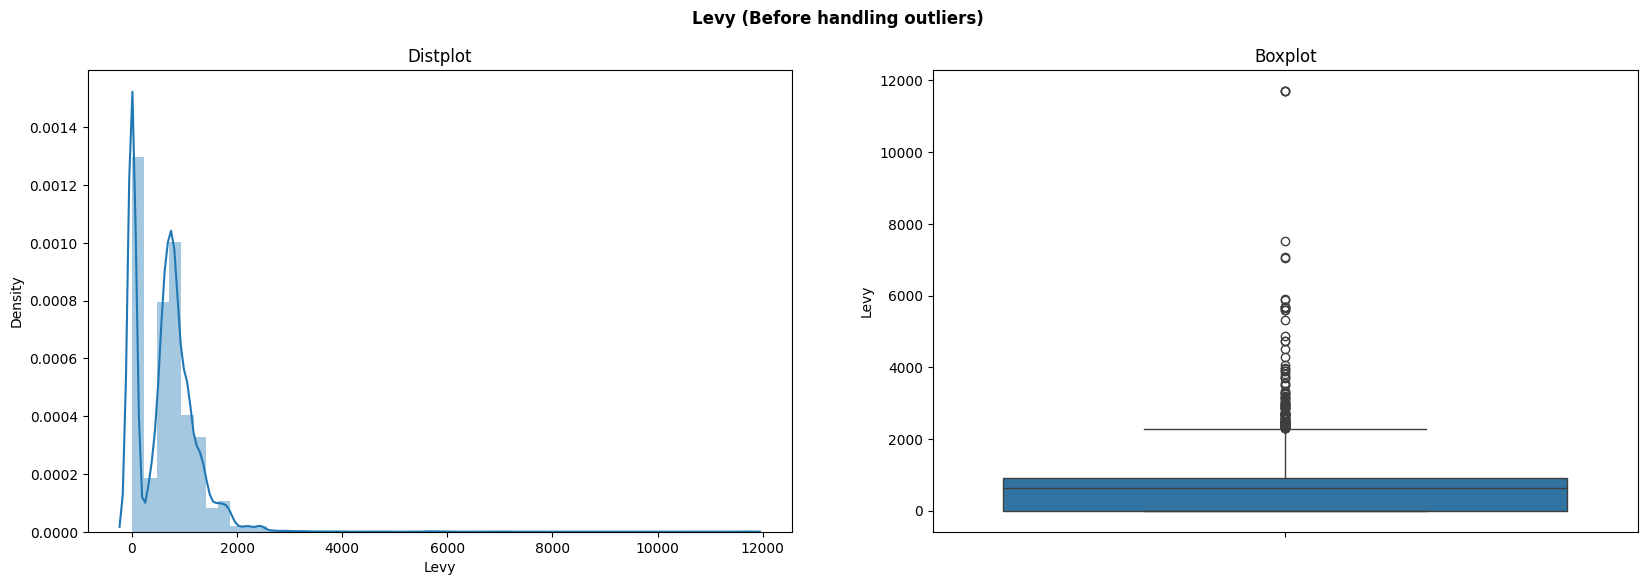

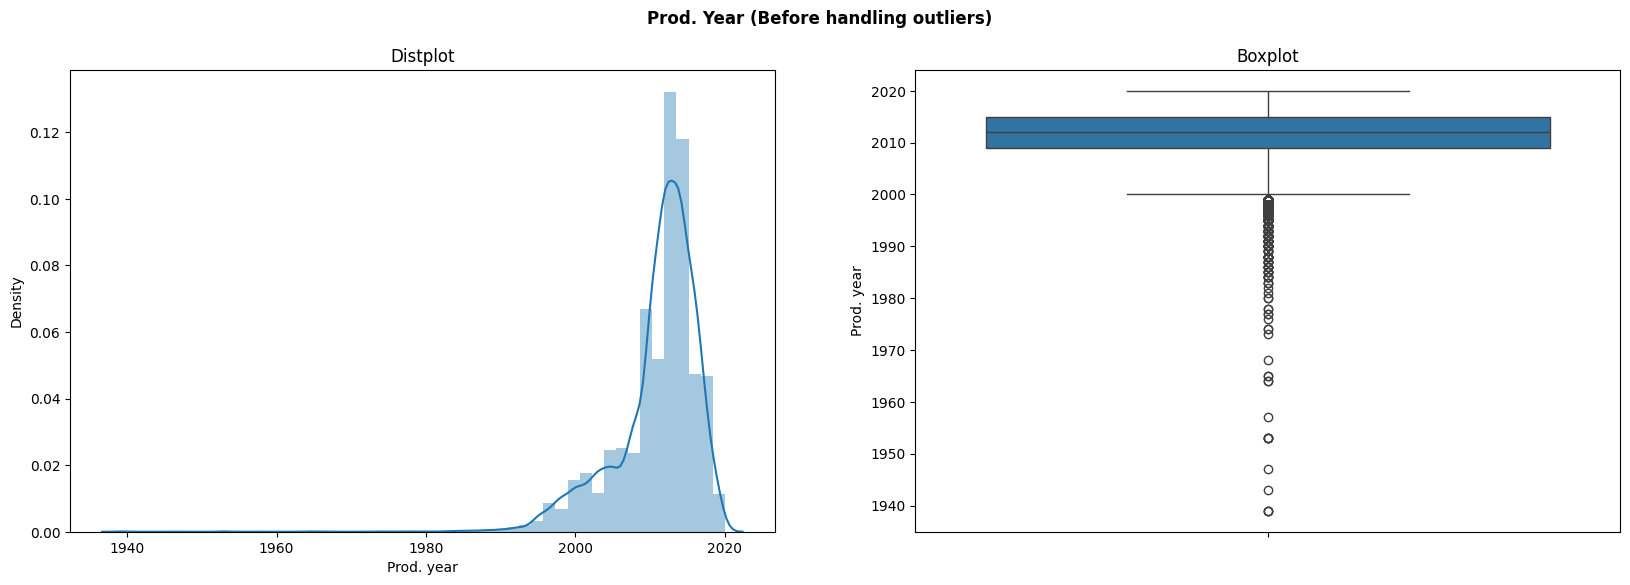

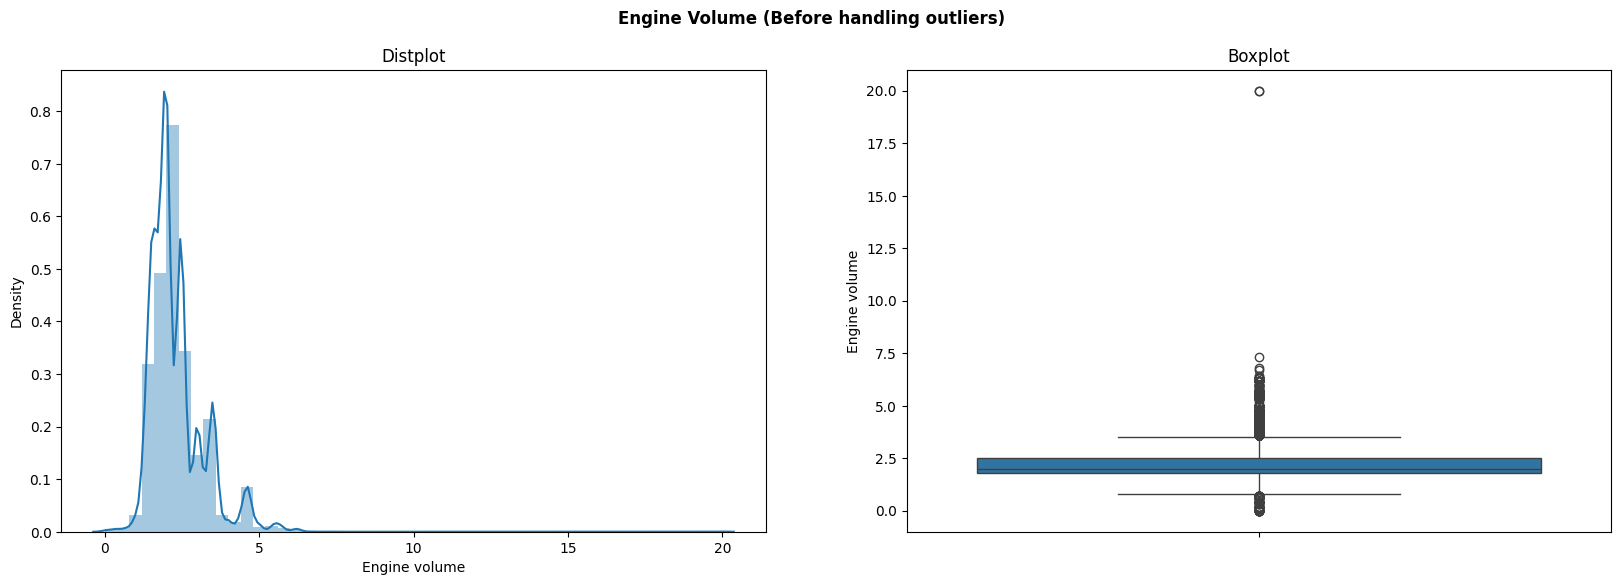

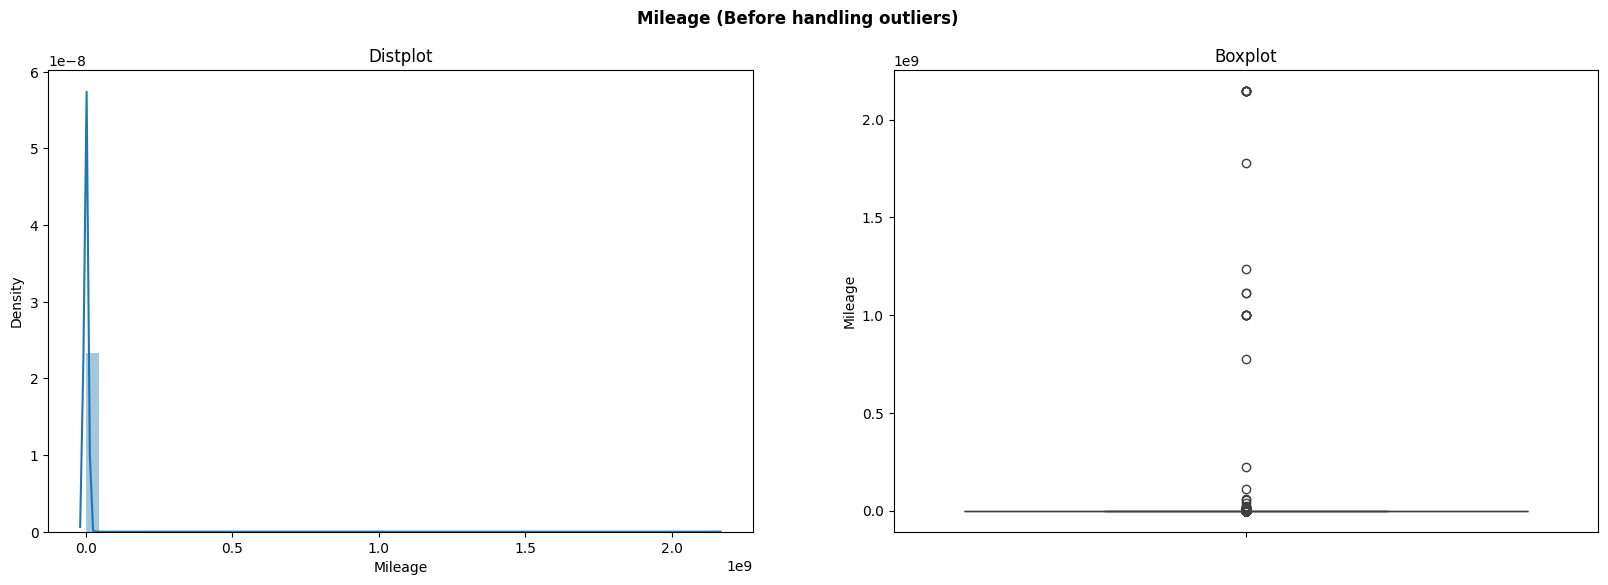

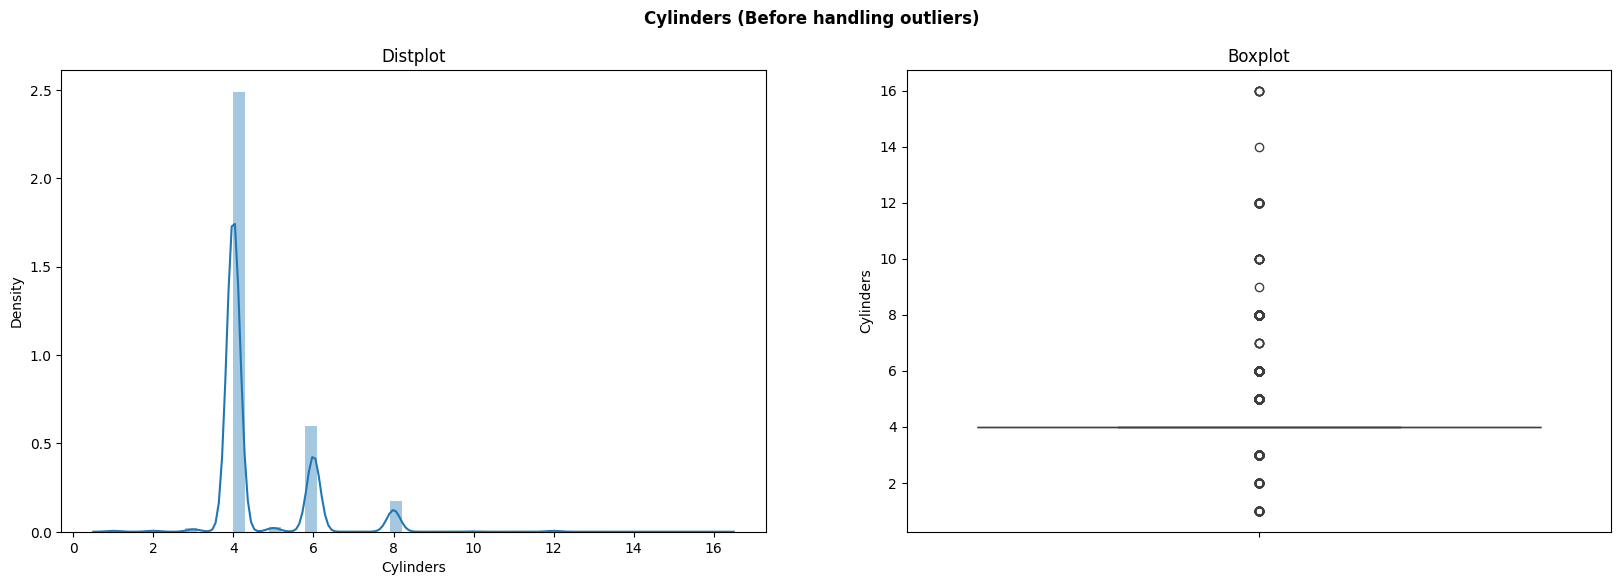

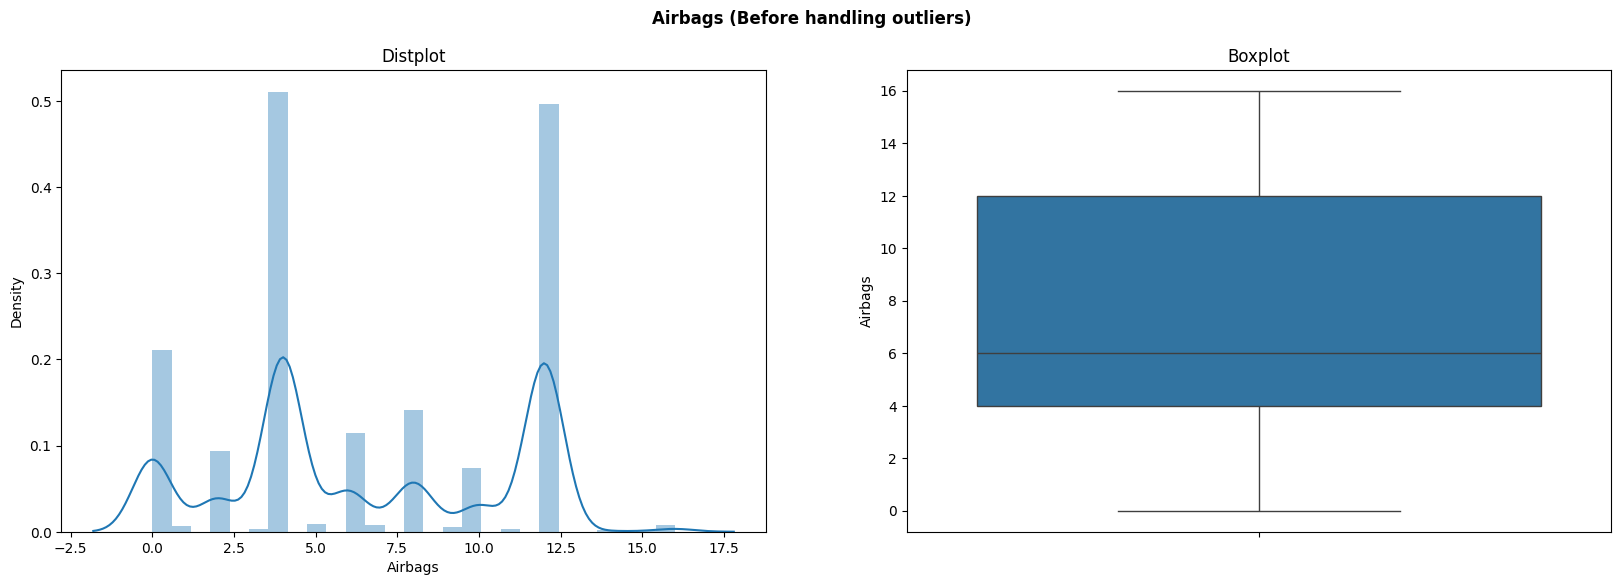

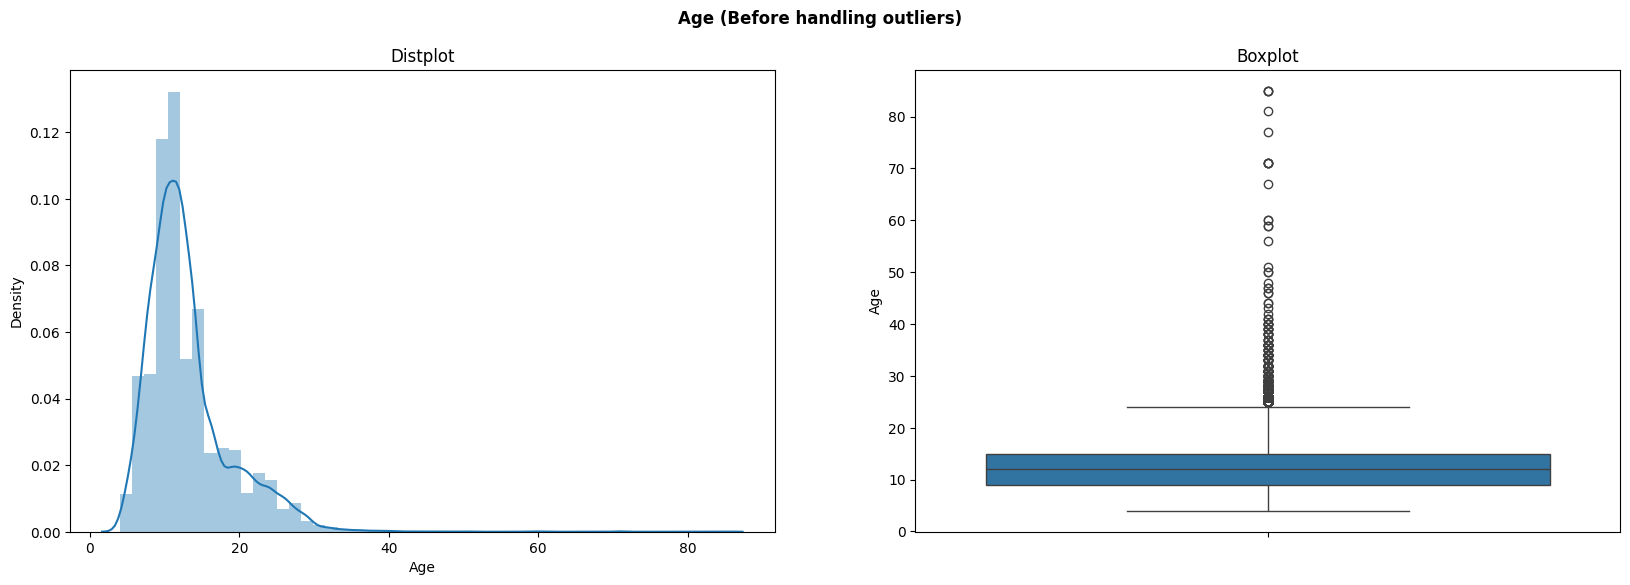

In [54]:
# Plotting Graphs Before treating outliers of continuous features
for col in numeric_data:
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    sns.distplot(data[col], ax=ax[0]).set(title="Distplot")
    sns.boxplot(data[col], ax=ax[1]).set(title="Boxplot")
    plt.suptitle(f'{col.title()} (Before handling outliers)', weight='bold')
    plt.show()


In [58]:
for col in numeric_data.columns:
    q1 = data[col].quantile(0.75)
    q3 = data[col].quantile(0.25)
    iqr = q1 - q3

    lower_bound = q3 - 1.5 * iqr
    upper_bound = q1 + 1.5 * iqr


# Data Transform

Convert all object columns to numerical by labelencoder for understanable for ML

In [59]:
obdata = data.select_dtypes(include=object)
numdata = data.select_dtypes(exclude=object)

In [60]:
for i in range(0,obdata.shape[1]):
    obdata.iloc[:,i] = lab.fit_transform(obdata.iloc[:,i])

In [61]:
data = pd.concat([obdata,numdata],axis=1)

In [62]:
data

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Age
0,32,1242,4,1,2,0,0,0,12,13328,1399.0,2010,3.5,186005,6.0,12,14
1,8,658,4,0,5,2,0,0,1,16621,1018.0,2011,3.0,192000,6.0,8,13
2,21,684,3,0,5,3,1,1,1,8467,0.0,2006,1.3,200000,4.0,2,18
3,16,661,4,1,2,0,0,0,14,3607,862.0,2011,2.5,168966,4.0,0,13
4,21,684,3,1,5,0,1,0,12,11726,446.0,2014,1.3,91901,4.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,36,385,1,1,0,1,2,0,12,8467,0.0,1999,2.0,300000,4.0,5,25
19233,23,1334,9,1,5,2,1,0,11,15681,831.0,2011,2.4,161600,4.0,8,13
19234,23,1442,4,1,1,0,1,0,7,26108,836.0,2010,2.0,116365,4.0,4,14
19235,8,456,4,1,1,0,1,0,1,5331,1288.0,2007,2.0,51258,4.0,4,17


# ML Model

In [63]:
x= data.drop('Price',axis=1)
y= data['Price']

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=5)

In [65]:
algorithm = ['LinearRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingRegressor','SVR']
R2=[]
RMSE = []

In [66]:
def models(model):
    model.fit(x_train,y_train)
    pre = model.predict(x_test)
    r2 = r2_score(y_test,pre)
    rmse = np.sqrt(mean_squared_error(y_test,pre))
    R2.append(r2)
    RMSE.append(rmse)
    score = model.score(x_test,y_test)
    print(f'The Score of Model is :{score}')

In [67]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()
model4 = GradientBoostingRegressor()
model5 = SVR()

In [68]:
models(model1)
models(model2)
models(model3)
models(model4)
models(model5)

The Score of Model is :-0.0001869920047463669
The Score of Model is :0.00045308844111746627
The Score of Model is :0.001094145006793945
The Score of Model is :0.0005806803917937087
The Score of Model is :-0.00069627509638992


In [69]:
df = pd.DataFrame({'Algorithm':algorithm, 'R2_score': R2, 'RMSE':RMSE})
df

,Algorithm,R2_score,RMSE
0,LinearRegression,-0.000187,379790.500898
1,DecisionTreeClassifier,0.000453,379668.955937
2,RandomForestClassifier,0.001094,379547.186608
3,GradientBoostingRegressor,0.000581,379644.722833
4,SVR,-0.000696,379887.180952


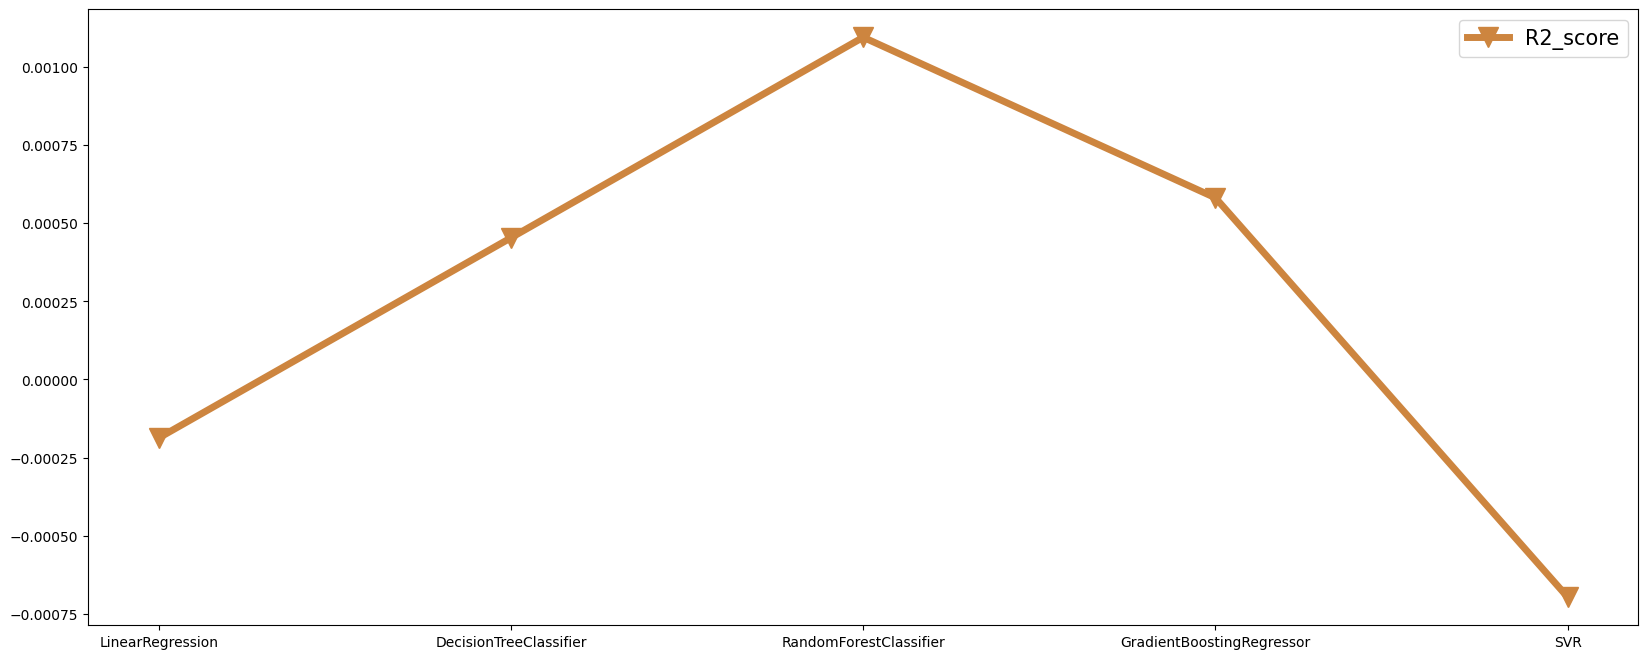

In [70]:
fig = plt.figure(figsize=(20,8))
plt.plot(df.Algorithm,df.R2_score ,label='R2_score',lw=5,color='peru',marker='v',markersize = 15)
plt.legend(fontsize=15)
plt.show()

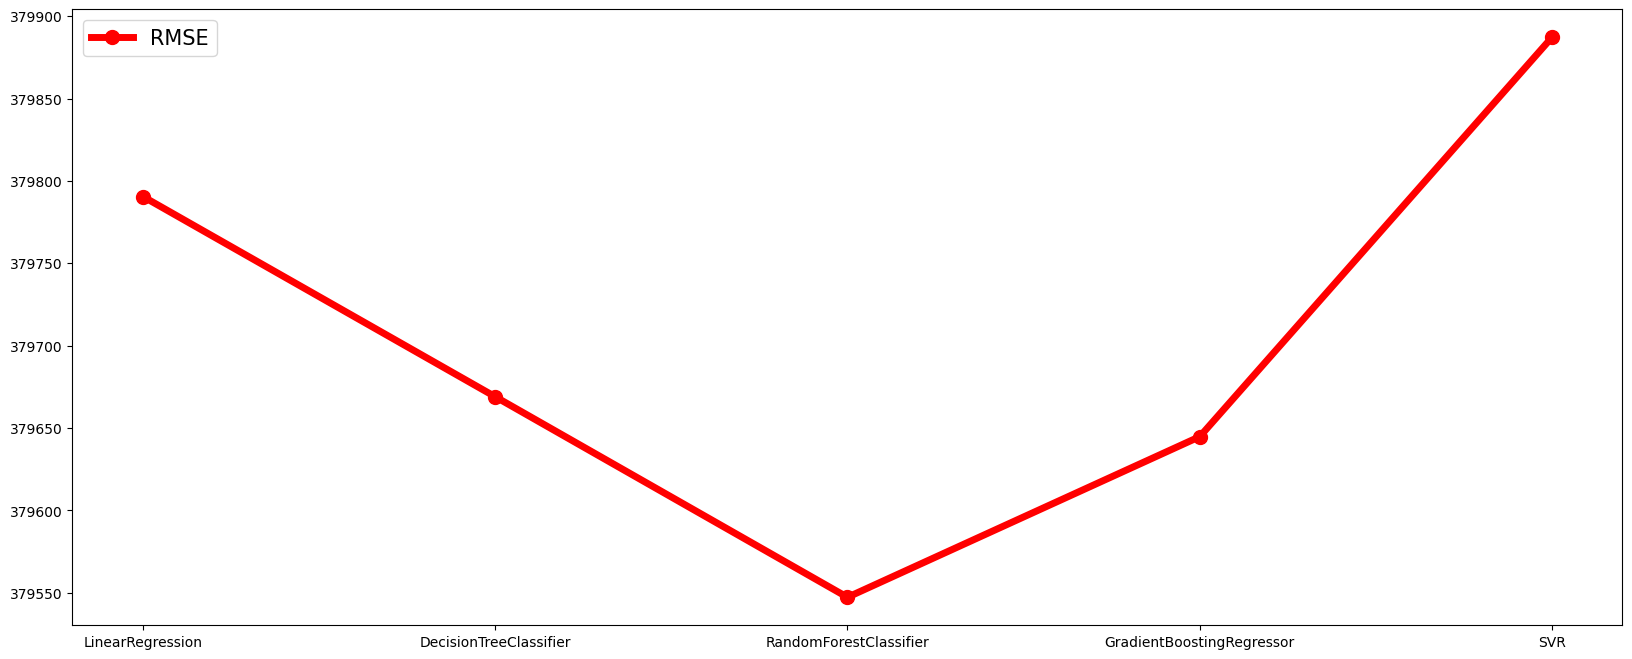

In [71]:
fig = plt.figure(figsize=(20,8))
plt.plot(df.Algorithm,df.RMSE ,label='RMSE',lw=5,color='r',marker='o',markersize = 10)
plt.legend(fontsize=15)
plt.show()

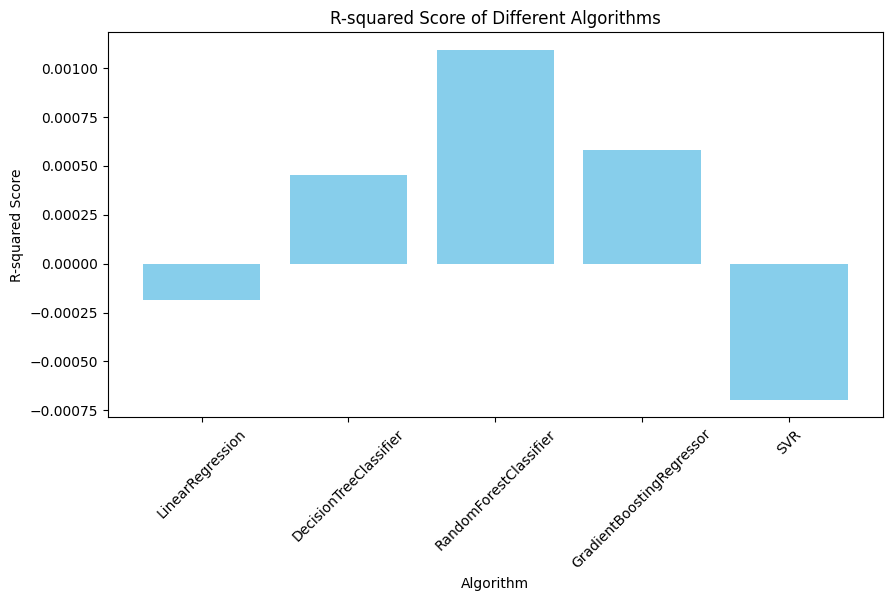

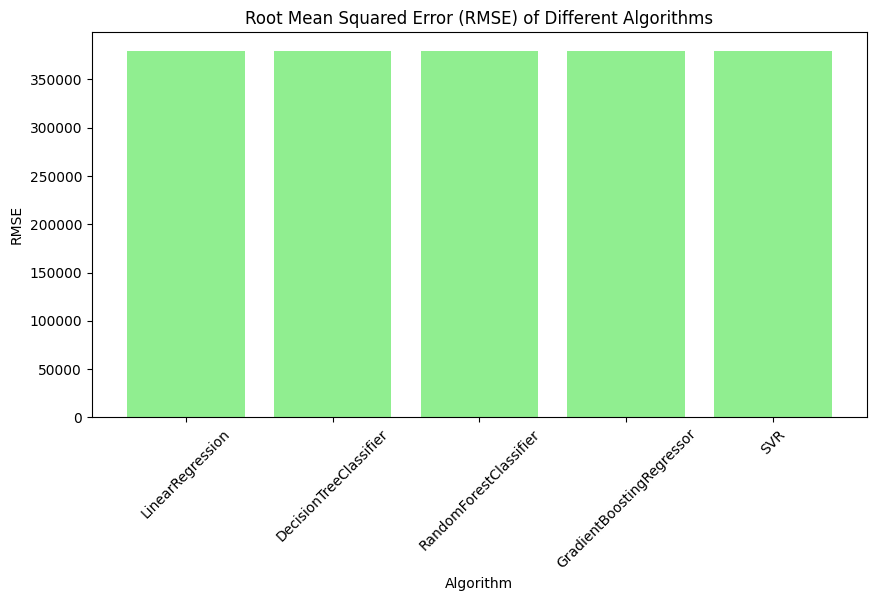

In [73]:
# Plotting R-squared scores
plt.figure(figsize=(10, 5))
plt.bar(algorithm, R2, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('R-squared Score')
plt.title('R-squared Score of Different Algorithms')
plt.xticks(rotation=45)
plt.show()

# Plotting RMSE scores
plt.figure(figsize=(10, 5))
plt.bar(algorithm, RMSE, color='lightgreen')
plt.xlabel('Algorithm')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) of Different Algorithms')
plt.xticks(rotation=45)
plt.show()


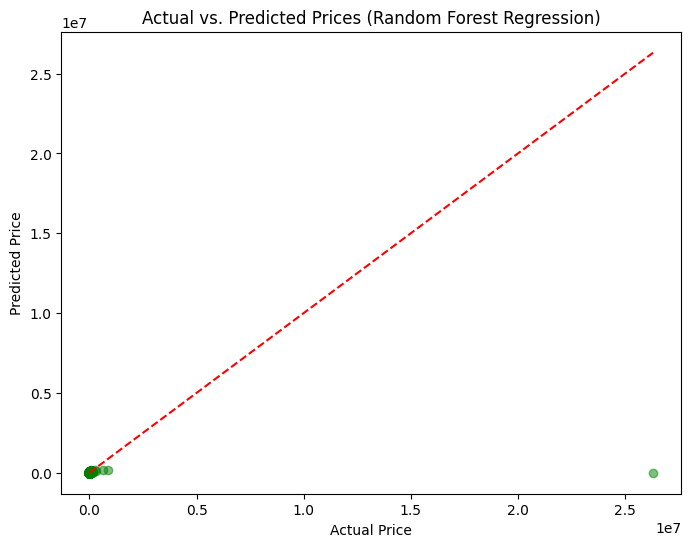

In [76]:
# Fit Random Forest model
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)

# Predictions for Random Forest model
rf_pred = random_forest.predict(x_test)

# Scatter plot of actual vs. predicted prices for Random Forest Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Random Forest Regression)')
plt.show()
